In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Open data file
df = pd.read_csv('2_Data for EDA_batch.csv')
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [4]:
X = df[['r_d_n-0', 'r_d_n-1', 'r_d_n-2', 'r_d_n-3', 'r_d_n-4', 'r_d_n-5', 'days_since_rain', 'month', 'season_int']]
y = df['target']

Text(0.5, 1.0, 'Days since rain vs. cumulative rainfall for 3 days by discharge')

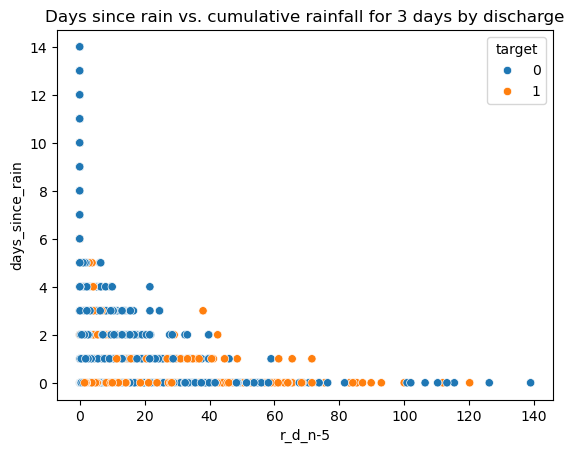

In [5]:
sns.scatterplot(data = df, x = 'r_d_n-5', y = 'days_since_rain', hue = 'target')
plt.title('Days since rain vs. cumulative rainfall for 3 days by discharge')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [7]:
# naive benchmark
base_acc = y_train.value_counts(normalize=True)
base_acc

target
0    0.808482
1    0.191518
Name: proportion, dtype: float64

In [8]:
pd.DataFrame({
    "train": pd.Series(y_train).value_counts(),
    "test":  pd.Series(y_test).value_counts()
})

,train,test
target,,
0,2440,797
1,578,209


In [9]:
numeric_features = ['r_d_n-0', 'r_d_n-1', 'r_d_n-2', 'r_d_n-3', 'r_d_n-4', 'r_d_n-5', 'days_since_rain']

transformer = make_column_transformer((StandardScaler(), numeric_features),
                                      remainder = 'passthrough')
svc_pipe = Pipeline([('transformer', transformer),
                     ('svc', SVC())])

In [10]:
svc_pipe.fit(X_train, y_train)
train_acc = svc_pipe.score(X_train, y_train)
test_acc = svc_pipe.score(X_test, y_test)
print('Train acc:', train_acc)
print("Test acc:", test_acc)

Train acc: 0.8581842279655401
Test acc: 0.8300198807157058


In [11]:
# SVM using linear kernel
svm_model = svm.SVC(kernel='linear', C=1, gamma='auto')
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print('Accuracy:', acc)
train_acc = svm_model.score(X_train, y_train)
test_acc = svm_model.score(X_test, y_test)
print('Train acc:', train_acc)
print("Test acc:", test_acc)

Accuracy: 0.7872763419483101
Train acc: 0.8144466534128562
Test acc: 0.7872763419483101


In [12]:
# SVM using linear kernel
svm_model = svm.SVC(kernel='linear', C=1, gamma='scale')
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print('Accuracy:', acc)
train_acc = svm_model.score(X_train, y_train)
test_acc = svm_model.score(X_test, y_test)
print('Train acc:', train_acc)
print("Test acc:", test_acc)

Accuracy: 0.7872763419483101
Train acc: 0.8144466534128562
Test acc: 0.7872763419483101


In [13]:
# SVM using rbf kernel
svm_model = svm.SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print('Accuracy:', acc)
train_acc = svm_model.score(X_train, y_train)
test_acc = svm_model.score(X_test, y_test)
print('Train acc:', train_acc)
print("Test acc:", test_acc)

Accuracy: 0.8320079522862823
Train acc: 0.8545394300861497
Test acc: 0.8320079522862823


In [14]:
# SVM using rbf kernel
svm_model = svm.SVC(kernel='rbf', C=1, gamma='auto')
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print('Accuracy:', acc)
train_acc = svm_model.score(X_train, y_train)
test_acc = svm_model.score(X_test, y_test)
print('Train acc:', train_acc)
print("Test acc:", test_acc)

Accuracy: 0.7932405566600398
Train acc: 0.9449966865473823
Test acc: 0.7932405566600398


In [15]:
# SVM using sigmoid kernel
svm_model = svm.SVC(kernel='sigmoid', C=1, gamma='auto')
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print('Accuracy:', acc)
train_acc = svm_model.score(X_train, y_train)
test_acc = svm_model.score(X_test, y_test)
print('Train acc:', train_acc)
print("Test acc:", test_acc)

Accuracy: 0.7922465208747514
Train acc: 0.8084824387011266
Test acc: 0.7922465208747514


In [16]:
# SVM using sigmoid kernel
svm_model = svm.SVC(kernel='sigmoid', C=1, gamma='scale')
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print('Accuracy:', acc)
train_acc = svm_model.score(X_train, y_train)
test_acc = svm_model.score(X_test, y_test)
print('Train acc:', train_acc)
print("Test acc:", test_acc)

Accuracy: 0.6699801192842942
Train acc: 0.6928429423459245
Test acc: 0.6699801192842942


In [17]:
# SVM using poly kernel
svm_model = Pipeline([
    ('scale', StandardScaler()),
    ('svc', SVC(
        kernel='poly',
        degree =4,
        C=0.1,
        gamma = 'auto',
        coef0 = 1.0,
        shrinking = True,
        cache_size = 1000,
        max_iter = 20000
    ))
])
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print('Accuracy:', acc)
test_acc = svm_model.score(X_test, y_test)
print('Train acc:', train_acc)
print("Test acc:", test_acc)

Accuracy: 0.8379721669980119
Train acc: 0.6928429423459245
Test acc: 0.8379721669980119


In [18]:
# looking for optimal C
#Cs = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000, 1000000]
Cs = [0.001, 0.01, 0.1, 1.0, 10, 1000]

best_acc = 0
best_C = 0

for c in Cs:
    svc_pipe_C = Pipeline([('transformer', transformer),
                       ('svc', SVC(C = c))])
    svc_pipe_C.fit(X_train, y_train)
    test_acc = svc_pipe_C.score(X_test, y_test)
    if test_acc > best_acc:
        best_acc = round(test_acc, 6)
        best_C = c

print(best_acc, f'{best_C:.6f}')

0.831014 10.000000


In [19]:
prob_pipe = Pipeline([('transformer', transformer),
                       ('svc', SVC(kernel = 'poly', degree=4, probability = True))])
prob_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['r_d_n-0', 'r_d_n-1',
                                                   'r_d_n-2', 'r_d_n-3',
                                                   'r_d_n-4', 'r_d_n-5',
                                                   'days_since_rain'])])),
                ('svc', SVC(degree=4, kernel='poly', probability=True))])

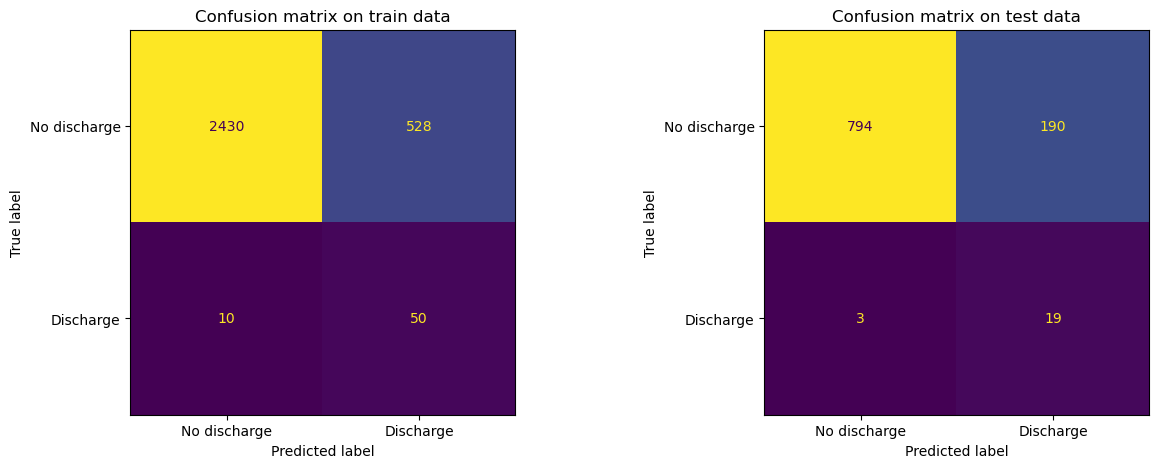

In [20]:
train_cmat = confusion_matrix(prob_pipe.predict(X_train), y_train)
test_cmat = confusion_matrix(prob_pipe.predict(X_test), y_test)
train_disp = ConfusionMatrixDisplay(train_cmat, display_labels=['No discharge', 'Discharge'])
test_disp = ConfusionMatrixDisplay(test_cmat, display_labels=['No discharge', 'Discharge'])
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
train_disp.plot(ax = ax[0], colorbar = False)
ax[0].set_title('Confusion matrix on train data')
test_disp.plot(ax = ax[1], colorbar = False)
ax[1].set_title('Confusion matrix on test data');

In [21]:
tn, fp, fn, tp = test_cmat.ravel()
test_precision = tp / (tp + fp)
test_recall = tp / (tp + fn)
print(f'Test set precision: {test_precision: .3f}')
print(f'Test set recall: {test_recall: .3f}')

Test set precision:  0.091
Test set recall:  0.864


In [22]:
prob_pipe = Pipeline([('transformer', transformer),
                       ('svc', SVC(
                           kernel = 'poly', 
                           degree=4, 
                           C=0.1,
                           gamma = 'auto',
                           coef0 = 1.0,
                           shrinking = True,
                           cache_size = 1000,
                           max_iter = 20000,
                           probability = True))])
prob_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['r_d_n-0', 'r_d_n-1',
                                                   'r_d_n-2', 'r_d_n-3',
                                                   'r_d_n-4', 'r_d_n-5',
                                                   'days_since_rain'])])),
                ('svc',
                 SVC(C=0.1, cache_size=1000, coef0=1.0, degree=4, gamma='auto',
                     kernel='poly', max_iter=20000, probability=True))])

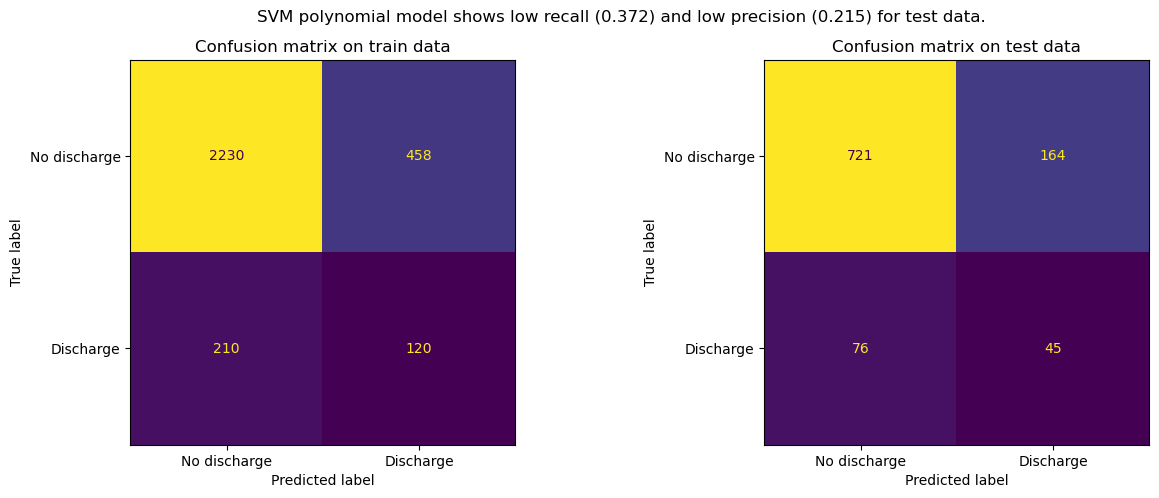

In [23]:
train_cmat = confusion_matrix(prob_pipe.predict(X_train), y_train)
test_cmat = confusion_matrix(prob_pipe.predict(X_test), y_test)
train_disp = ConfusionMatrixDisplay(train_cmat, display_labels=['No discharge', 'Discharge'])
test_disp = ConfusionMatrixDisplay(test_cmat, display_labels=['No discharge', 'Discharge'])
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle('SVM polynomial model shows low recall (0.372) and low precision (0.215) for test data.')
train_disp.plot(ax = ax[0], colorbar = False)
ax[0].set_title('Confusion matrix on train data')
test_disp.plot(ax = ax[1], colorbar = False)
ax[1].set_title('Confusion matrix on test data');

In [24]:
tn, fp, fn, tp = test_cmat.ravel()
test_precision = tp / (tp + fp)
test_recall = tp / (tp + fn)
print(f'Test set precision: {test_precision: .3f}')
print(f'Test set recall: {test_recall: .3f}')

Test set precision:  0.215
Test set recall:  0.372


In [25]:
prob_pipe = Pipeline([('transformer', transformer),
                       ('svc', SVC())])
prob_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['r_d_n-0', 'r_d_n-1',
                                                   'r_d_n-2', 'r_d_n-3',
                                                   'r_d_n-4', 'r_d_n-5',
                                                   'days_since_rain'])])),
                ('svc', SVC())])

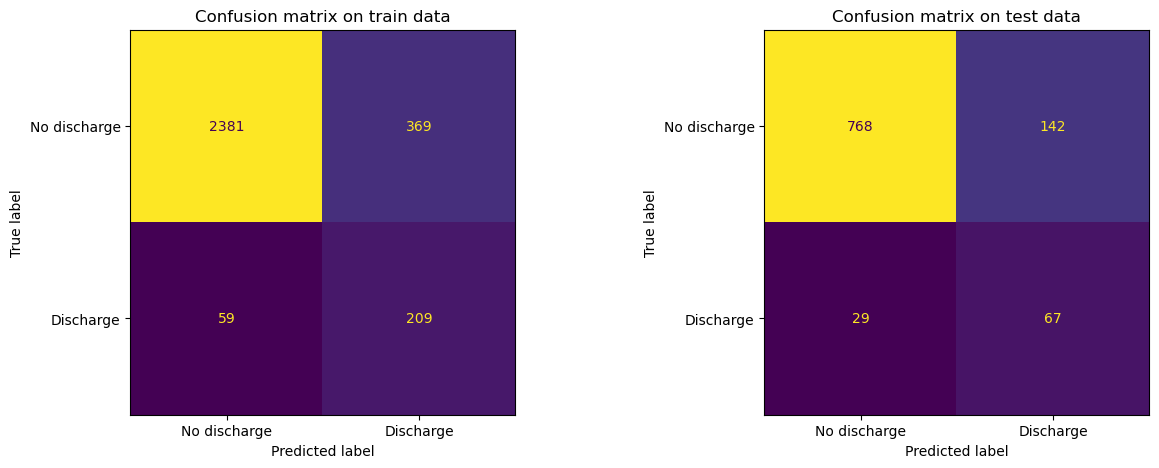

In [26]:
train_cmat = confusion_matrix(prob_pipe.predict(X_train), y_train)
test_cmat = confusion_matrix(prob_pipe.predict(X_test), y_test)
train_disp = ConfusionMatrixDisplay(train_cmat, display_labels=['No discharge', 'Discharge'])
test_disp = ConfusionMatrixDisplay(test_cmat, display_labels=['No discharge', 'Discharge'])
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
train_disp.plot(ax = ax[0], colorbar = False)
ax[0].set_title('Confusion matrix on train data')
test_disp.plot(ax = ax[1], colorbar = False)
ax[1].set_title('Confusion matrix on test data');

In [27]:
tn, fp, fn, tp = test_cmat.ravel()
test_precision = tp / (tp + fp)
test_recall = tp / (tp + fn)
print(f'Test set precision: {test_precision: .3f}')
print(f'Test set recall: {test_recall: .3f}')

Test set precision:  0.321
Test set recall:  0.698
